In [4]:
from rdkit.Chem import AllChem as ch
from rdkit.Chem import Draw as d
from rdkit import DataStructs
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

In [20]:
suppl = ch.SDMolSupplier('../data/drugbank.sdf')
organic_carbon = ch.MolFromSmarts('[#6]')
mols = [x for x in suppl if x is not None and x.HasSubstructMatch(organic_carbon)]

In [21]:
mols_fps = [(m, ch.GetMorganFingerprint(m, 2)) for m in mols]

In [22]:
picker = MaxMinPicker()

In [23]:
def fp_distance(i, j, mols_fps=mols_fps):
    return 1 - DataStructs.TanimotoSimilarity(mols_fps[i][1],
                                              mols_fps[j][1])

In [24]:
pickIndices = picker.LazyPick(fp_distance, len(mols_fps), 100, seed=666)

In [25]:
filtered_mols_fps = [mols_fps[i] for i in pickIndices]
result = filtered_mols_fps

In [26]:
map(ch.Compute2DCoords, (m for m, sim in result))
img = d.MolsToGridImage([m for m, sim in result], kekulize=False, subImgSize=(400,400),
                        legends=[mol.GetProp("GENERIC_NAME") + ': ' + str(sim)
                                 for mol, sim in result])

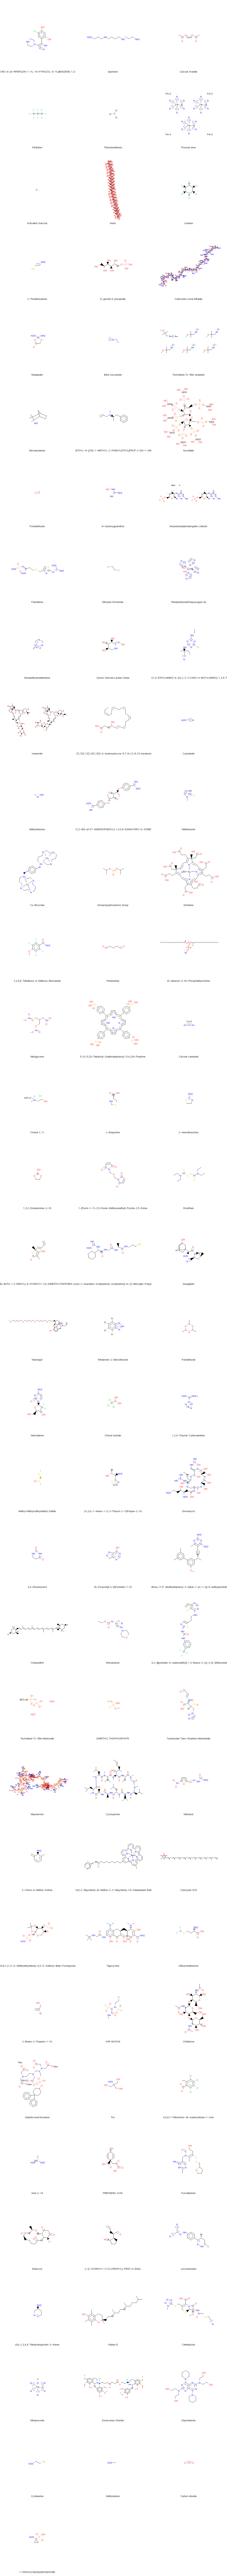

In [27]:
img